<a href="https://colab.research.google.com/github/Jaomiew/DPDM2023/blob/main/Data102(Chapter2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data102

เมื่อนำข้อมูลเข้ามา เราสามารถอธิบาย สร้างตารางใหม่รวมไปถึงการทำ boxplot และกราฟเพื่ออธิบายได้ว่าเกิดอะไรขึ้นที่นั้น

- พานำข้อมูลเข้าด้วยการเชื่อมกับ Google Drive
- Step 1 : พาดูข้อมูลว่ามีเท่าไร กี่ row กี่ column
- Step 2 : Descriptive statistical อ่านข้อมูล
- Step 3 : การทำ Boxplot
- Step 4 : การทำกราฟ
- HW3 ลองทำตั้งแต่ Step 1-4

---

In [1]:
import pandas

In [2]:
##table = pandas.read_csv('/content/csv')

In [3]:
##table

In [4]:
##table.shape

นำข้อมูลเข้ามาด้วยการใช้คำสั่ง ด้านล่าง

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ตั้งตัวแปรชื่อว่า table_from_drive

In [6]:
table_from_drive = pandas.read_csv('/content/drive/MyDrive/DPDM23_DATA/csv')

In [7]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,70,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


#step 1 : Eyesball the Data (1: Eyesball the Data)

คือการเช็คว่าข้อมูลมีขนาดเท่าไร

In [8]:
table_from_drive.shape

(9, 9)

# Step 2 : Descriptive statistical

คือการอ่านค่าว่าโดยรวมแล้วเป็นยังไง

In [9]:
table_from_drive.describe()

,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2565.666667,94.444444,20.444444,35.222222,1.666667,2.888889,38.333333,63.888889
std,0.500000,9.658042,3.244654,10.521143,1.000000,1.746027,7.000000,9.002700
min,2565.000000,70.000000,17.000000,27.000000,0.000000,0.000000,31.000000,47.000000
25%,2565.000000,94.000000,18.000000,28.000000,1.000000,2.000000,32.000000,60.000000
50%,2566.000000,95.000000,20.000000,30.000000,2.000000,3.000000,35.000000,62.000000
75%,2566.000000,100.000000,22.000000,39.000000,2.000000,4.500000,47.000000,69.500000
max,2566.000000,101.000000,26.000000,57.000000,3.000000,5.000000,47.000000,75.000000


เช่น
- ข้อมูลทั้งหมดมีประมาณ 9 เดือน (ดูจาก count แล้วก็ไปเทียบตาม datapoint (datapoint คือจำนวนข้อมูลแนวนอน))
- โดยรวมแล้วมีจำนวนคนที่ยังเป็นรัฐบาลอยู่ (Amount_Government) ประมาณ 94.444 (ดูไดที่ค่า mean)
- โดยที่จำนวนที่ในรัฐบาลอยู่น้อยที่สุดคืออยู่ที่ 70 คน (ดูได้ที่ค่า min)
-จำนวนที่ในรัฐบาลอยู่มากที่สุดคืออยู่ที่ 101 คน (ดูได้ที่ค่า max)

เป็นต้น


In [10]:
table_from_drive.head() #ดูหัวตาราง เเสดงเเค่ข้อมูลเเค่ 5 เเถวแรก

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0


In [11]:
table_from_drive.tail() #ดูท้ายตาราง เเสดงเเค่ข้อมูลเเค่ 5 เเถวสุดท้าย

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,70,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


In [12]:
table_from_drive.head(7) # table_name.head(7) เเสดงเเค่ข้อมูลเเค่ 7 เเถวเเรก

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,70,17,29,1,1.0,32,62.0


### data Selection (indexing and slicing)

เราสามารถเลือกดูข้อมูลเฉพาะได้เช่น

table view

ดูข้อมูล Amount_Government ลำดับที่ 2 ว่ามีค่าเท่าไร

In [13]:
table_from_drive['Amount_Government'][2] #indexing

94

In [14]:
table_from_drive['Amount_Government'][:2] #row slicing

0    95
1    95
Name: Amount_Government, dtype: int64

เรายังสามารถเลือกตารางที่ต้องการได้เช่น ต้องการเฉพาะ Amount_Government และ Amount_Day_Sickleave

In [15]:
table_from_drive[['Amount_Government','Amount_Day_Sickleave']] #column slicing = create new table

,Amount_Government,Amount_Day_Sickleave
0,95,28
1,95,57
2,94,27
3,94,27
4,100,30
5,100,33
6,70,29
7,101,47
8,101,39


เรายังสามารถเก็บไว้ใช้ด้วยการสร้างตัวแปรมารองรับ

In [16]:
new_table = table_from_drive[['Amount_Government','Amount_Day_Sickleave']] #column slicing = create new table

In [17]:
new_table

,Amount_Government,Amount_Day_Sickleave
0,95,28
1,95,57
2,94,27
3,94,27
4,100,30
5,100,33
6,70,29
7,101,47
8,101,39


## array view

เรายังสามารถเลือกตารางที่ต้องการได้เช่น ต้องการเฉพาะโดยการใช้มุมมอง array ด้วยวิธีการ .iloc

In [18]:
table_from_drive.iloc[2,2] #indexing

94

In [19]:
table_from_drive.iloc[2:8,2:8:2] #slicing

,Amount_Government,Amount_Day_Sickleave,Amount_ Day_Personalleave
2,94,27,4.5
3,94,27,4.5
4,100,30,5.0
5,100,33,4.0
6,70,29,1.0
7,101,47,2.0


assing value to pandas DataFrame

เราสามารถเปลี่ยนค่าในตารางได้ ให้เป็นค่าที่ต้องการโดยมีหลายวิธีดังนี้

### วิธีที่ 1.standard method

เช่นต้องการเปลี่ยน Amount_Government ตัวที่ 6 ให้มีค่า 83

In [20]:
table_from_drive.loc[6,'Amount_Government'] = 83

In [21]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,83,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


### วิธีที่ 2.table view

เช่นต้องการเปลี่ยน Amount_Government ตัวที่ 6 ให้มีค่า 84

In [22]:
table_from_drive['Amount_Government'][6] = 84

<ipython-input-22-025bcee2802a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_from_drive['Amount_Government'][6] = 84


In [23]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


### วิธีที่ 3.array view

เช่นต้องการเปลี่ยน Amount_Government ตัวที่ -1,2 ให้มีค่า 130

In [24]:
table_from_drive.iloc[-1,2] = 130

In [25]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,130,25,39,2,3.0,34,61.0


# Step 3: Boxplot

ไว้สำหรับอ่านค่า boxplot หรือทำให้ missing value หายไป

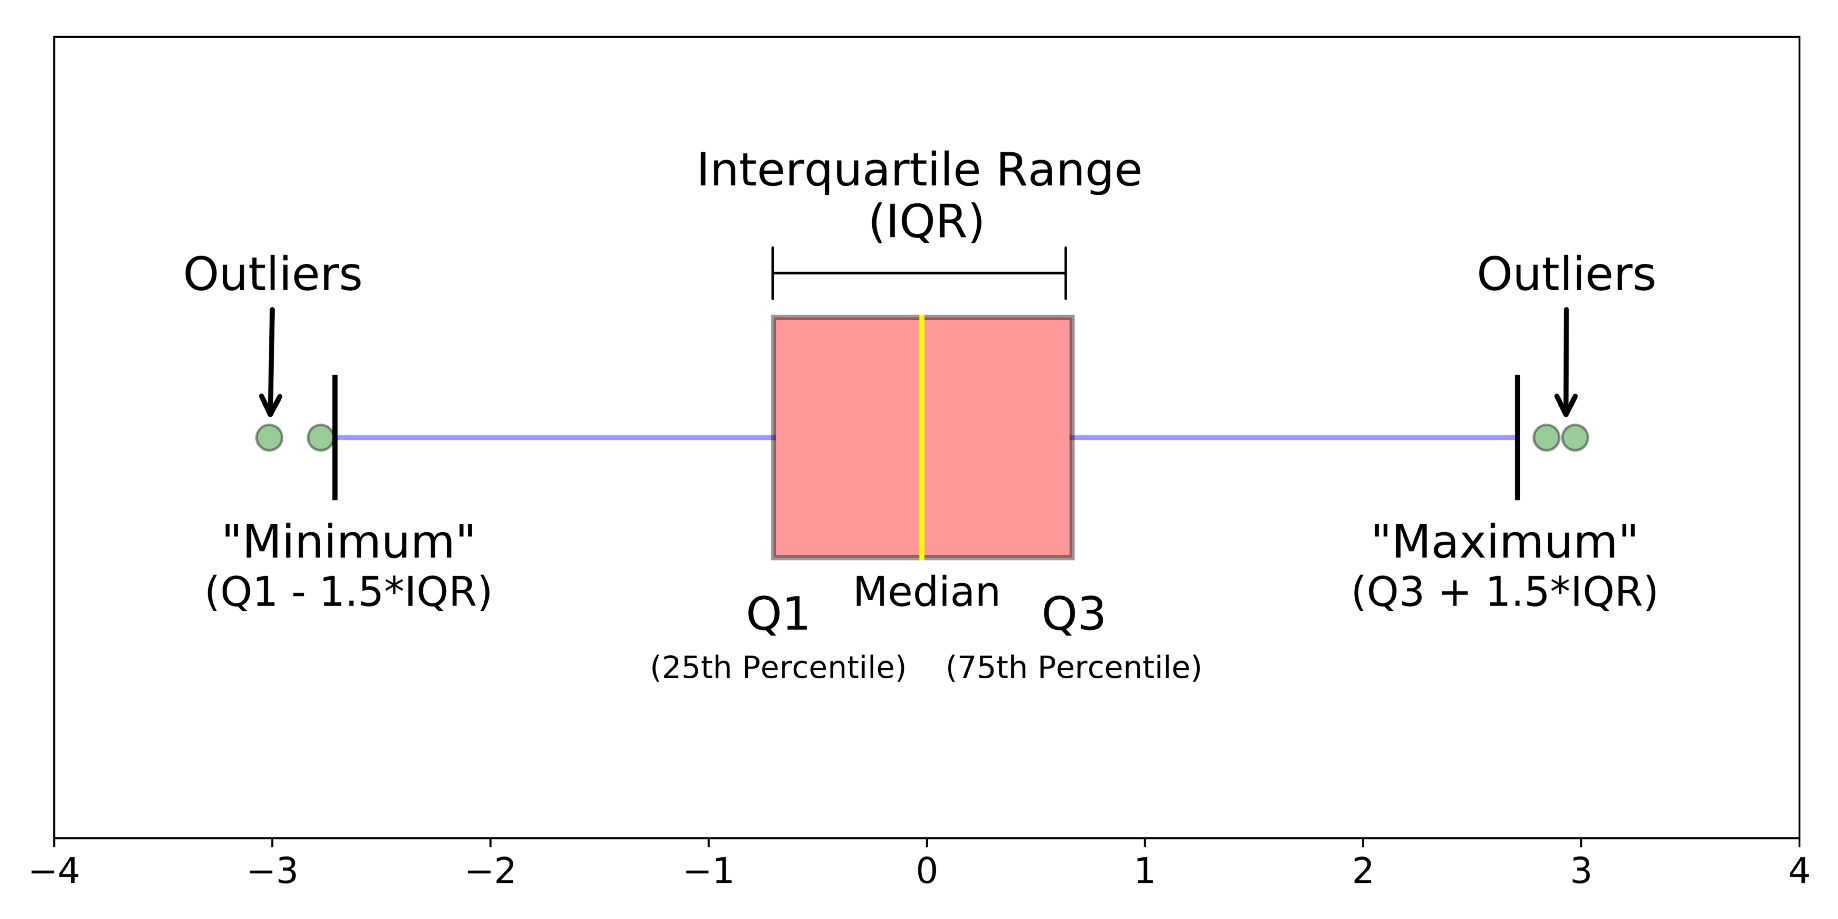

In [26]:
from matplotlib import pyplot as plt #Library: matplotlib สำหรับวาดรูป plot graph, packet : pyplot  ตั้งชื่อว่า plt

In [27]:
table_from_drive['Amount_Government']

0     95
1     95
2     94
3     94
4    100
5    100
6     84
7    101
8    130
Name: Amount_Government, dtype: int64

ต้องการ boxplot จากตารางชื่อว่า table_from_drive ในแถว Amount_Government

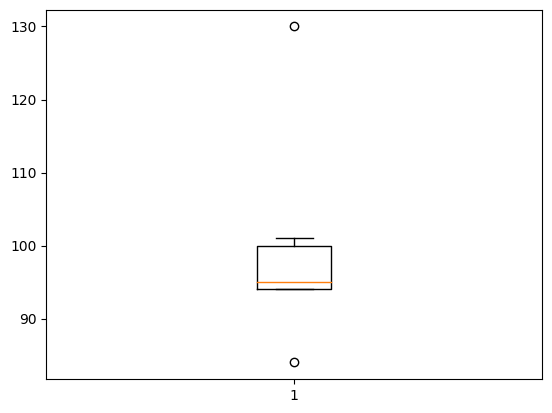

In [28]:
plt.boxplot(table_from_drive['Amount_Government']);

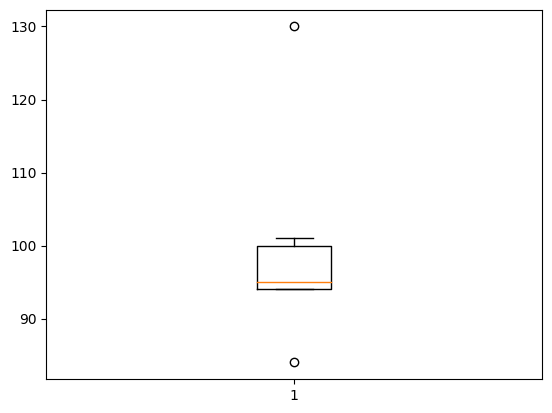

In [29]:
plt.boxplot(table_from_drive['Amount_Government']);

## take values from boxplot

ต้องการ boxplot จากตารางชื่อว่า table_from_drive ในแถว Amount_Government แล้วตั้งตัวแปรชื่อว่า boxplot_output เพื่อนำไปดูว่าคืออะไร

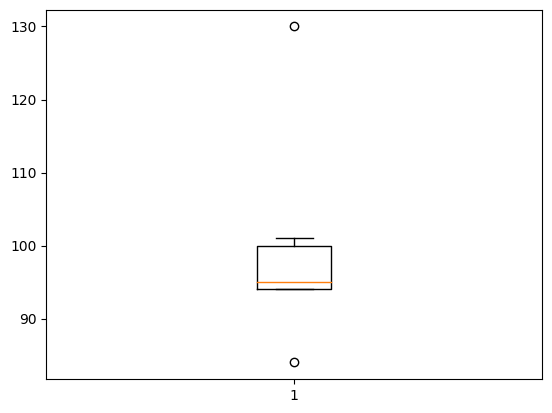

In [30]:
boxplot_output = plt.boxplot(table_from_drive['Amount_Government'])

In [31]:
boxplot_output #Dictionary

{'whiskers': [<matplotlib.lines.Line2D at 0x7865a80bd090>,
 'caps': [<matplotlib.lines.Line2D at 0x7865a80bd5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865a80bcdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7865a80bdb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7865a80bddb0>],
 'means': []}

- Whisker คือหนวดที่บอกขอบเขตของ outlier อยู่ที่ไหน (ไว้กำจัด outliner)
- caps บอกว่าขนาดกราฟอยู่ที่ตำแหน่งไหน (ไม่จำเป็น)
- boxes บอกว่าขนาดแต่ละจุดของกล่อง boxplox คือเท่าไร (ไม่จำเป็น)
- medians คือค่ากลางใน boxplox
- filers คือตัวที่เป็น ouliner (ไว้ดูเฉยๆว่ามีค่าอะไรบ้าง)

In [97]:
#ใช้อันนี้ในการเช็ึคว่าทำแต่ละตัวคืออะไร
boxplot_output['boxes'][0].get_ydata()

array([0.925, 1.075, 1.075, 0.925, 0.925])

In [32]:
boxplot_output['fliers']

In [33]:
boxplot_output['fliers'][0]

In [34]:
boxplot_output['fliers'][0].get_ydata()

array([ 84, 130])

In [35]:
boxplot_output['fliers'][0].get_ydata()[0]

84

In [36]:
boxplot_output['fliers'][0].get_ydata()[1]

130

# Querying and Filtering



```python
DataFrame[list_of_logics] #len(list_of_logics) = len(DataFrame)
```



เราสามารถ filering หรือเลือกเฉพาะที่ต้องการโดยให้ค่ามันเป็น true ถ้าอยากดูตารางนั้น

In [37]:
table_from_drive[[False,False,False,True,False,True,False,False,False]]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0


all row that have amount_sickleave equal to 20

เราสามารถหาค่า Amount_Sickleave = 20 ได้

In [38]:
table_from_drive['Amount_Sickleave']==20

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: Amount_Sickleave, dtype: bool

In [39]:
table_from_drive[table_from_drive['Amount_Sickleave']==20]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0


## test multiple parameters

กรณีที่เราใส่ค่า parameter อื่นๆ

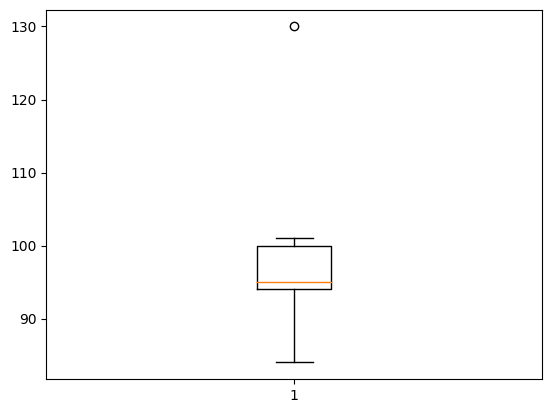

In [40]:
boxplot_output = plt.boxplot(table_from_drive['Amount_Government'],whis=2)

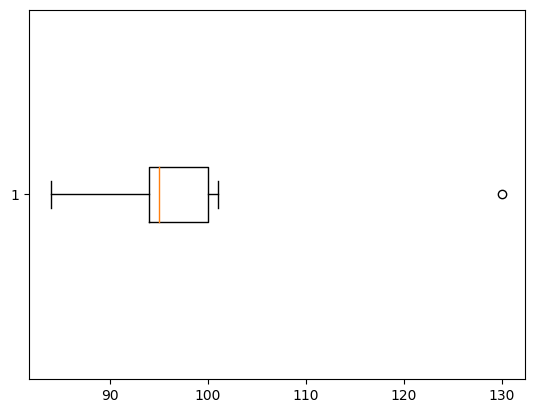

In [41]:
boxplot_output = plt.boxplot(table_from_drive['Amount_Government'],whis=2,vert=False)

# Quiz 3

filter out the outliets row ($'Amount\_Government'$)

การกำจัด row Amount_Government ที่มีค่า outlier ออก

In [42]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,130,25,39,2,3.0,34,61.0


In [43]:
#ผิด
table_from_drive[(table_from_drive['Amount_Government'] != 83) & (table_from_drive['Amount_Government'] != 130)]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0


เฉลย

In [98]:
#ถ้าหาค่าไม่เจอให้ใช้ .get_ydata
boxplot_output['whiskers'][0].get_xdata().min()

84.0

In [94]:
boxplot_output['whiskers'][1].get_xdata().max()

101.0

วิธีการคือ

เก็บค่า Amount_Government ทุกตัวที่ค่า max ของ outliner น้อยกว่าและค่า mim มากกว่า outliner โดยใช้ whister ที่เป็นหนวดมาควบคุม

In [95]:
table_from_drive[(table_from_drive['Amount_Government']<=boxplot_output['whiskers'][1].get_xdata().max()) &
                 (table_from_drive['Amount_Government']>=boxplot_output['whiskers'][0].get_xdata().min())]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0


# Step 4: Plot all datapoints (depend on data type)

ไว้ plot กราฟ

Time Series

plt.plot(ความยาวของข้อมูล,ข้อมูล amount Government จากตาราง table_from_device)

(range(len(table_from_drive)) หมายถึงขนาด มีเท่ากับ table_from_drive

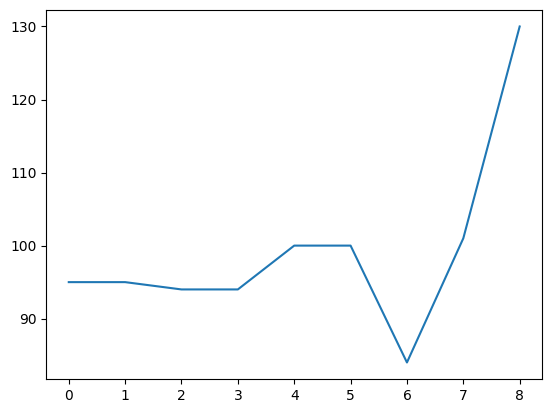

In [47]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'])

เราสามารถเลือกลักษณะ(o หมายถึงจุดๆนั้นเป็นวงกลม) เส้น(:หมายถึงเป็นเส้นจุด) และสี(r หมายถึง red สีแดง)ได้

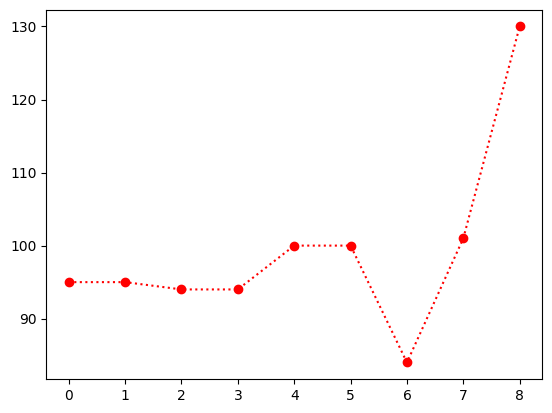

In [48]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o:r')

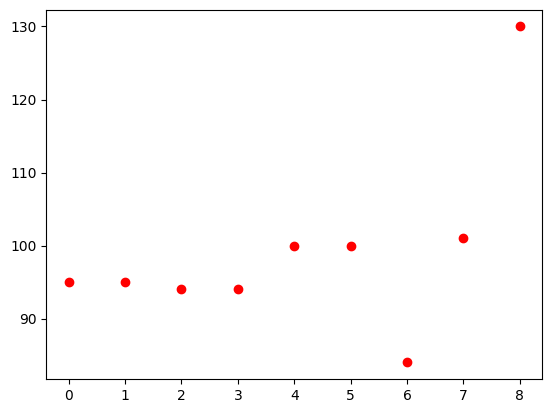

In [49]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'or')

plt.title('Monthy Amount_Government') หมายถึงบอกชื่อตารางว่า Monthy Amount_Government

Text(0.5, 1.0, 'Monthy Amount_Government')

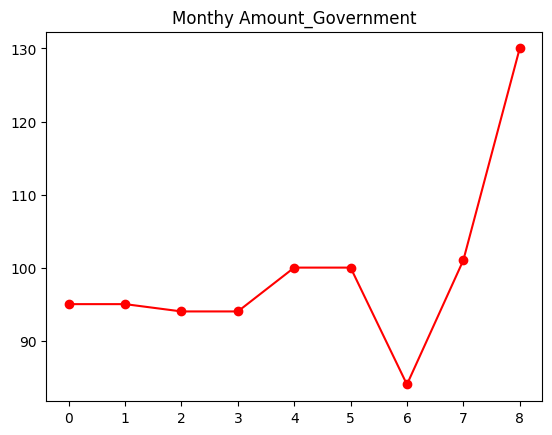

In [50]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Monthy Amount_Government')

plt.xlabel('Month') หมายถึงให้แกน X เป็นชื่อ Month

Text(0.5, 0, 'Month')

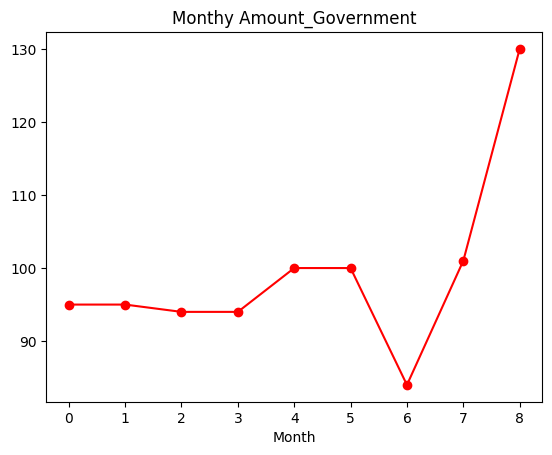

In [51]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Monthy Amount_Government')
plt.xlabel('Month')

plt.ylabel('Amount_Government') หมายถึงให้แกน y เป็นชื่อ Amount_Government

Text(0, 0.5, 'Amount_Government')

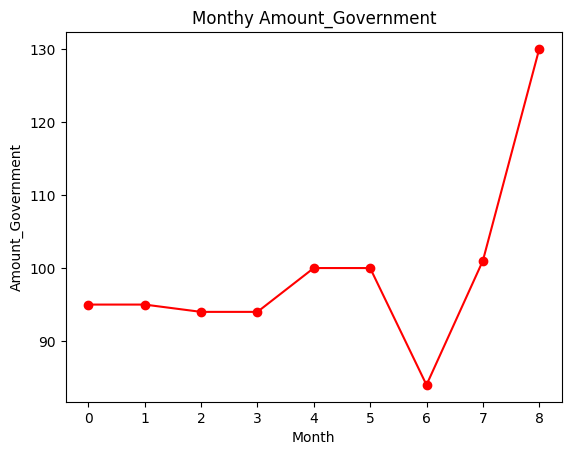

In [52]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Monthy Amount_Government')
plt.xlabel('Month')
plt.ylabel('Amount_Government')

กำหนดให้

lebels_month=['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun']

plt.xticks(range(len(table_from_drive)),lebels_month); #เปลี่ยนชื่อเดือนจาก 0 - 9 เป็นเดือนต่างๆ

คือชื่อเดือนตามขนาดของข้อมูล

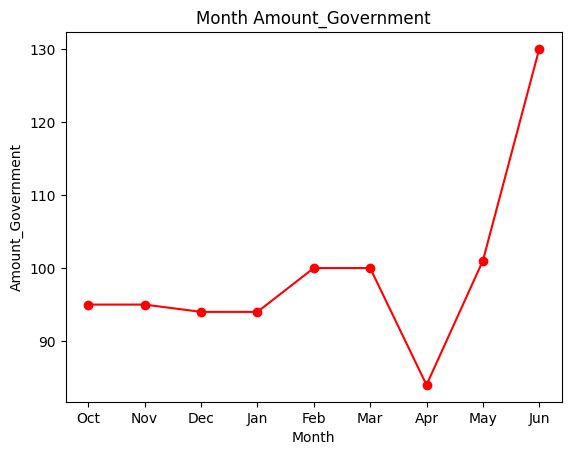

In [53]:
lebels_month=['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'] #create name
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Month Amount_Government')
plt.xlabel('Month')
plt.ylabel('Amount_Government')
plt.xticks(range(len(table_from_drive)),lebels_month); #เปลี่ยนชื่อเดือนจาก 0 - 9 เป็นเดือนต่างๆ

compare 2 columns

สามรถใส่ข้อมูลอื่นๆได้

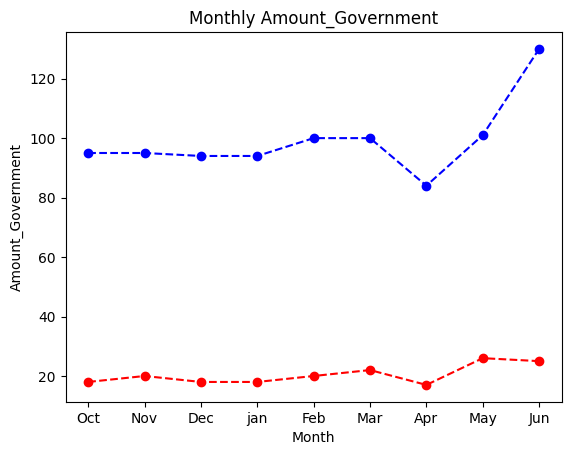

In [54]:
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Government'],'o--b')
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],'o--r')
plt.title('Monthly Amount_Government')
plt.xlabel('Month')
plt.ylabel('Amount_Government')
labels = ['Oct','Nov','Dec','jan','Feb','Mar','Apr','May','Jun']
plt.xticks(range(len(table_from_drive)),labels);

plt.legend(); ในการแสดงค่าเส้นที่เห็นว่ามันคืออะไร โดยให้แต่ละ กราฟที่นำเข้ามา label ด้วย

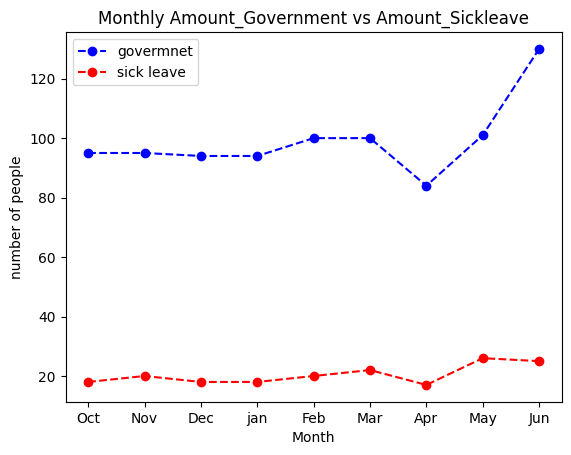

In [55]:
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Government'],'o--b',label='govermnet')
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],'o--r',label='sick leave')
plt.title('Monthly Amount_Government vs Amount_Sickleave')
plt.xlabel('Month')
plt.ylabel('number of people')
labels = ['Oct','Nov','Dec','jan','Feb','Mar','Apr','May','Jun']
plt.xticks(range(len(table_from_drive)),labels)
plt.legend();

# Barchart

โชว์จำนวนทั้งหมดเป็นแท่ง

<BarContainer object of 9 artists>

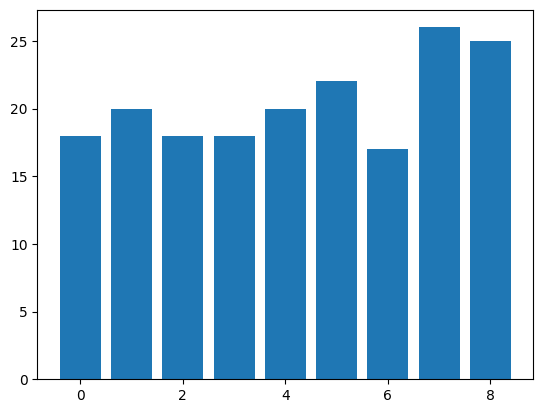

In [56]:
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'])

เราสามารถใช้แบบเดียวกับ time series เพื่ออธิบายว่า กราฟนี้คือกราฟอะไร

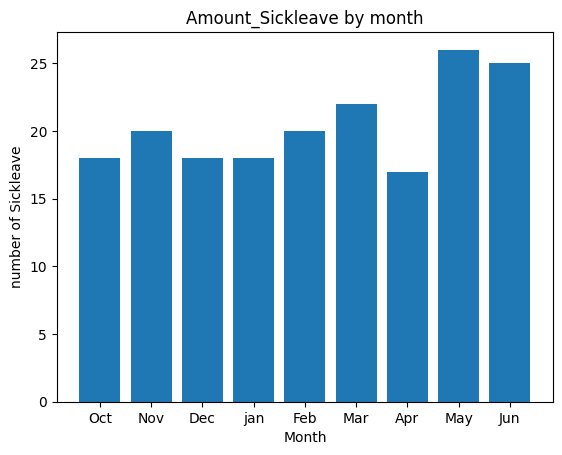

In [57]:
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'])
plt.title('Amount_Sickleave by month')
plt.xlabel('Month')
plt.ylabel('number of Sickleave')
plt.xticks(range(len(table_from_drive)),labels);

## Stacked barchart

ใช้ในการต่อ bar chart ที่แตกต่างกันเพื่อดูภาพรวม

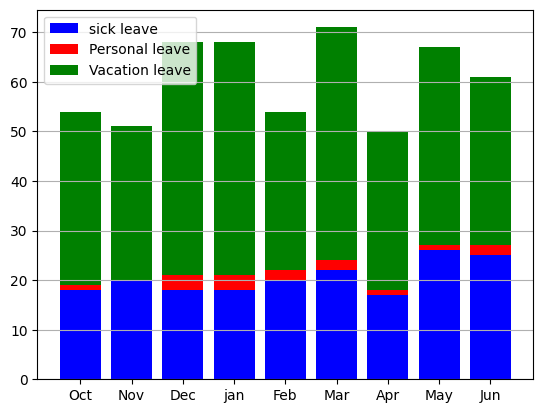

In [58]:
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],color='b',label='sick leave')
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_ Personalleave'],bottom=table_from_drive['Amount_Sickleave'],color='r',label='Personal leave')
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_ Vacationleave'],bottom=table_from_drive['Amount_ Personalleave']+table_from_drive['Amount_Sickleave'],color='g',label='Vacation leave')
plt.xticks(range(len(table_from_drive)),labels)
plt.grid(True,axis='y')
plt.legend();

Group Bar chart

In [59]:
import numpy as np
width = 0.2
np.array(range(len(table_from_drive)))-width

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8,  5.8,  6.8,  7.8])

ใช้การในการแยกกลุ่มของแต่ละ bar chart

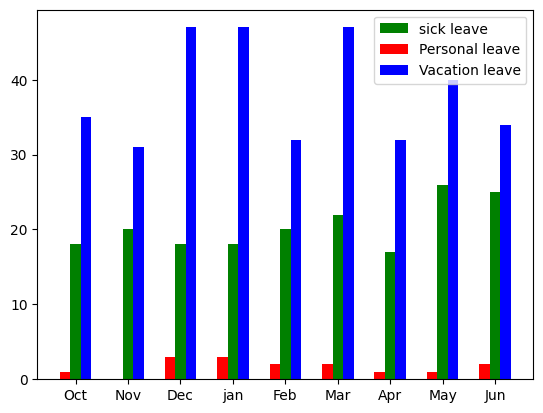

In [60]:
width = 0.2
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],width,color='g',label='sick leave')
plt.bar(np.array(range(len(table_from_drive)))-width, table_from_drive['Amount_ Personalleave'],width,color='r',label='Personal leave')
plt.bar(np.array(range(len(table_from_drive)))+width, table_from_drive['Amount_ Vacationleave'],width,color='b',label='Vacation leave')
plt.xticks(range(len(table_from_drive)),labels)
plt.legend();

hw3

select your data and do step 1 to 4

(eyes ball,descriptive statistical, bot plot (filter out outliers) ,plot the dataset with plot, stacked bar and grouped bar)

Data ได้มาจากข้อมูลจำนวนผู้เสียชีวิตจากอุบัติเหตุบนท้องถนน ในกรุงเทพมหานคร

https://data.bangkok.go.th/dataset/accident

In [61]:
table_ex = pandas.read_csv('/content/drive/MyDrive/DPDM23_DATA/66.csv')
table_ex

,No,Month,Year,ThonN_dead,ThonS_dead,KTN_dead,KTC_dead,KTE_dead,KTS_dead,TTL_Dead
0,1,มกราคม,2566,8,15,6,4,20,9,62
1,2,กุมภาพันธ์,2566,6,13,10,4,32,16,81
2,3,มีนาคม,2566,10,15,13,5,23,9,75
3,4,เมษายน,2566,7,14,11,4,32,15,83
4,5,พฤษภาคม,2566,6,12,16,12,18,7,71
5,6,มิถุนายน,2566,12,13,13,6,16,8,68
6,7,กรกฎาคม,2566,10,16,16,10,19,7,78


รายละเอียดแต่ละ row (Codebook)

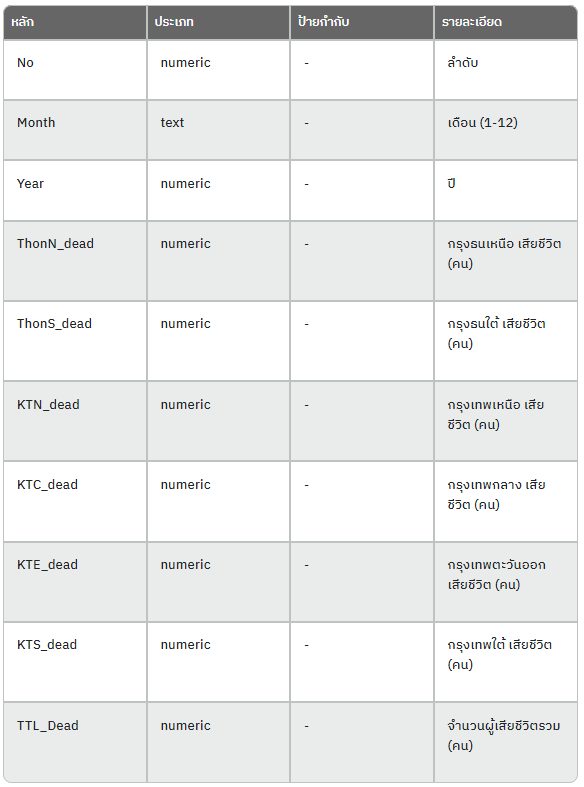

## Step 1: Eyes ball data

In [62]:
table_ex.shape

(7, 10)

ขนาดของข้อมูลอยู่ที่ 7(column)x10(row)

In [63]:
table_ex.isnull().any()

No            False
Month         False
Year          False
ThonN_dead    False
ThonS_dead    False
KTN_dead      False
KTC_dead      False
KTE_dead      False
KTS_dead      False
TTL_Dead      False
dtype: bool

ทำการหา missing value พบว่าไม่มีค่า missing value

## Step 2: Descriptive Statistic

In [64]:
table_ex.describe()

,No,Year,ThonN_dead,ThonS_dead,KTN_dead,KTC_dead,KTE_dead,KTS_dead,TTL_Dead
count,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,2566.0,8.428571,14.000000,12.142857,6.428571,22.857143,10.142857,74.000000
std,2.160247,0.0,2.299068,1.414214,3.532165,3.258688,6.593648,3.760699,7.483315
min,1.000000,2566.0,6.000000,12.000000,6.000000,4.000000,16.000000,7.000000,62.000000
25%,2.500000,2566.0,6.500000,13.000000,10.500000,4.000000,18.500000,7.500000,69.500000
50%,4.000000,2566.0,8.000000,14.000000,13.000000,5.000000,20.000000,9.000000,75.000000
75%,5.500000,2566.0,10.000000,15.000000,14.500000,8.000000,27.500000,12.000000,79.500000
max,7.000000,2566.0,12.000000,16.000000,16.000000,12.000000,32.000000,16.000000,83.000000


##Step 3: Boxplot

ในการทำ Box plot ได้เลือกลักษณะข้อมูลที่สนใจจึงเลือก
- ThonN_dead (จำนวนคนตายในเขตกรุงธนเหนือ)
- ThonS_dead (จำนวนคนตายในเขตกรุงธนใต้)
- KTN_dead (จำนวนคนตายในเขตกรุงเทพเหนือ)
- KTS_dead (จำนวนคนตายในเขตกรุงเทพใต้)

ทำ Box plot ของจำนวนคนตายในเขตกรุงธนเหนือ (ThonN_dead)

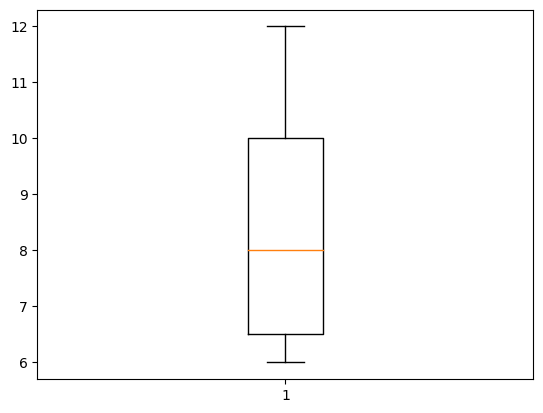

In [65]:
ThonN_dead = plt.boxplot(table_ex['ThonN_dead']);

In [66]:
ThonN_dead

{'whiskers': [<matplotlib.lines.Line2D at 0x7865a8117730>,
 'caps': [<matplotlib.lines.Line2D at 0x7865a8115ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865a8117580>],
 'medians': [<matplotlib.lines.Line2D at 0x7865a81160b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7865a8117790>],
 'means': []}

In [67]:
ThonN_dead['boxes'][0].get_ydata()

array([ 6.5,  6.5, 10. , 10. ,  6.5])

In [68]:
ThonN_dead['medians'][0].get_ydata()

array([8., 8.])

In [69]:
ThonN_dead['fliers'][0].get_ydata()

array([], dtype=int64)

จากข้อมูลของจำนวนคนตายในเขตกรุงธนเหนือ (ThonN_dead) พบว่า

- Q1 = 6.5
- Q2 หรือ Median = 8
- Q3 = 10
- และไม่มี outliers

ทำ Box plot ของจำนวนคนตายในเขตกรุงธนใต้ (ThonS_dead)

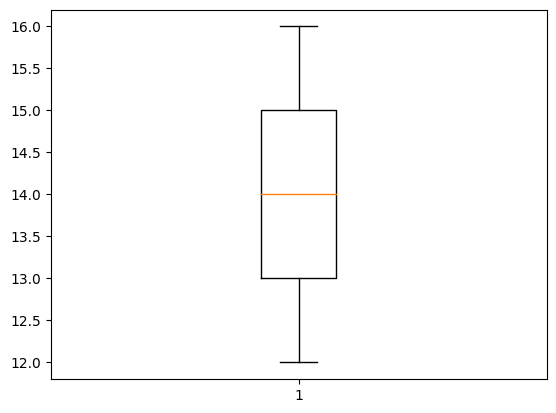

In [70]:
ThonS_dead = plt.boxplot(table_ex['ThonS_dead']);

In [71]:
ThonS_dead

{'whiskers': [<matplotlib.lines.Line2D at 0x7865aa174130>,
 'caps': [<matplotlib.lines.Line2D at 0x7865aa1750c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865aa175480>],
 'medians': [<matplotlib.lines.Line2D at 0x7865aa1769e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7865aa175240>],
 'means': []}

In [72]:
ThonS_dead['boxes'][0].get_ydata()

array([13., 13., 15., 15., 13.])

In [73]:
ThonS_dead['medians'][0].get_ydata()

array([14., 14.])

In [74]:
ThonS_dead['fliers'][0].get_ydata()

array([], dtype=int64)

จากข้อมูลของจำนวนคนตายในเขตกรุงธนใต้ (ThonS_dead) พบว่า

- Q1 = 13
- Q2 หรือ Median = 14
- Q3 = 15
- และไม่มี outliers

ทำ Box plot ของจำนวนคนตายในเขตกรุงเทพเหนือ (KTN_dead)

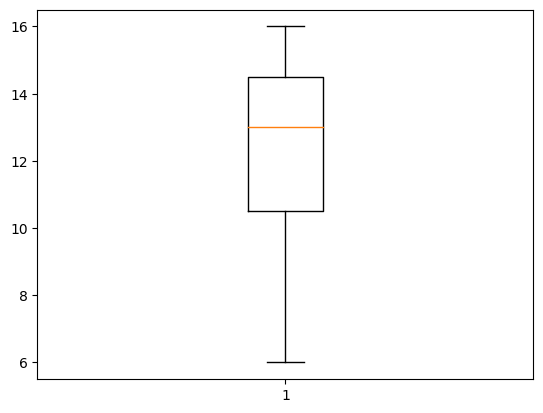

In [75]:
KTN_dead = plt.boxplot(table_ex['KTN_dead']);

In [76]:
KTN_dead

{'whiskers': [<matplotlib.lines.Line2D at 0x7865a79f4e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7865a79f52a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865a79f4be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7865a79f57e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7865a79f5a80>],
 'means': []}

In [77]:
KTN_dead['boxes'][0].get_ydata()

array([10.5, 10.5, 14.5, 14.5, 10.5])

In [78]:
KTN_dead['medians'][0].get_ydata()

array([13., 13.])

In [79]:
KTN_dead['fliers'][0].get_ydata()

array([], dtype=int64)

จากข้อมูลของจำนวนคนตายในเขตกรุงเทพเหนือ (KTN_dead) พบว่า

- Q1 = 10.5
- Q2 หรือ Median = 13
- Q3 = 14.5
- และไม่มี outliers

ทำ Box plot ของจำนวนคนตายในเขตกรุงเทพใต้ (KTS_dead)

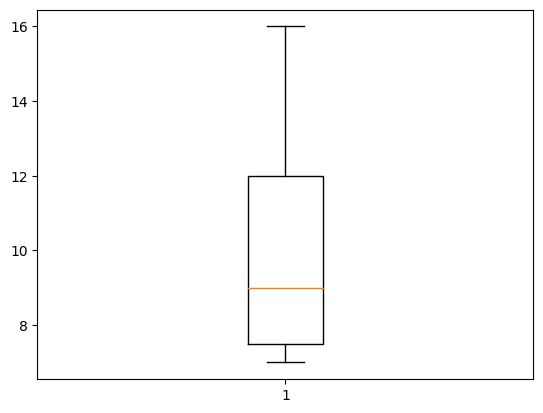

In [80]:
KTS_dead = plt.boxplot(table_ex['KTS_dead']);

In [81]:
KTS_dead

{'whiskers': [<matplotlib.lines.Line2D at 0x7865a7878250>,
 'caps': [<matplotlib.lines.Line2D at 0x7865a7878790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865a7a3bf70>],
 'medians': [<matplotlib.lines.Line2D at 0x7865a7878cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7865a7878f70>],
 'means': []}

In [82]:
KTS_dead['boxes'][0].get_ydata()

array([ 7.5,  7.5, 12. , 12. ,  7.5])

In [83]:
KTS_dead['medians'][0].get_ydata()

array([9., 9.])

In [84]:
KTS_dead['fliers'][0].get_ydata()

array([], dtype=int64)

จากข้อมูลของจำนวนคนตายในเขตกรุงเทพใต้ (KTS_dead) พบว่า

- Q1 = 7.5
- Q2 หรือ Median = 9
- Q3 = 12
- และไม่มี outliers

## Step 4 : plot and bar

plot เส้นเวลาโดยนำข้อมูลที่สนใจมา plot เป็นกราฟเส้น

In [85]:
labels = ['jan','Feb','Mar','Apr','May','Jun','July']

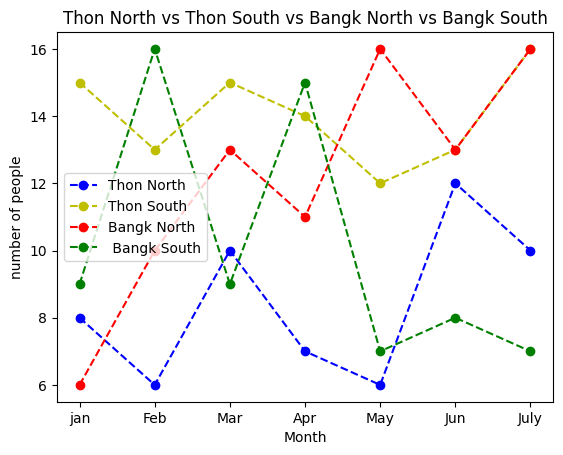

In [86]:
plt.plot(range(len(table_ex)), table_ex['ThonN_dead'],'o--b',label='Thon North')
plt.plot(range(len(table_ex)), table_ex['ThonS_dead'],'o--y',label='Thon South')
plt.plot(range(len(table_ex)), table_ex['KTN_dead'],'o--r',label='Bangk North')
plt.plot(range(len(table_ex)), table_ex['KTS_dead'],'o--g',label=' Bangk South')
plt.title('Thon North vs Thon South vs Bangk North vs Bangk South')
plt.xlabel('Month')
plt.ylabel('number of people')
plt.xticks(range(len(table_ex)),labels)
plt.legend();

Bar Chart

Strack Bar chart ดูจำนวนผู้เสียชีวิตทั้งหมดในแต่ละเดือน ของแต่ละเขตแบบรวมกัน

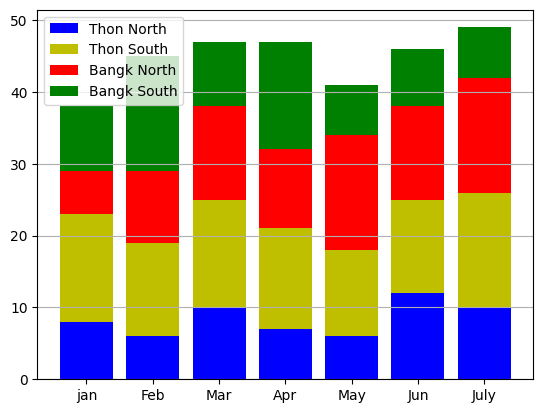

In [87]:
plt.bar(range(len(table_ex)), table_ex['ThonN_dead'],color='b',label='Thon North')
plt.bar(range(len(table_ex)), table_ex['ThonS_dead'],bottom=table_ex['ThonN_dead'],color='y',label='Thon South')
plt.bar(range(len(table_ex)), table_ex['KTN_dead'],bottom=table_ex['ThonS_dead']+table_ex['ThonN_dead'],color='r',label='Bangk North')
plt.bar(range(len(table_ex)), table_ex['KTS_dead'],bottom=table_ex['KTN_dead']+table_ex['ThonS_dead']+table_ex['ThonN_dead'],color='g',label='Bangk South')
plt.xticks(range(len(table_ex)),labels)
plt.grid(True,axis='y')
plt.legend();

Group Bar chart
ดูจำนวนผู้เสียชีวิตทั้งหมดในแต่ละเดือน ของแต่ละเขตแบบแยกกัน

In [88]:
width = 0.2
np.array(range(len(table_ex)))-width

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8,  5.8])

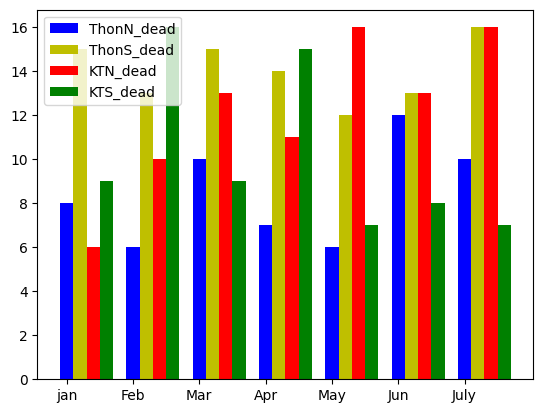

In [89]:
width = 0.2
plt.bar(range(len(table_ex)), table_ex['ThonN_dead'],width,color='b',label='ThonN_dead')
plt.bar(np.array(range(len(table_ex)))+width, table_ex['ThonS_dead'],width,color='y',label='ThonS_dead')
plt.bar(np.array(range(len(table_ex)))+width+width, table_ex['KTN_dead'],width,color='r',label='KTN_dead')
plt.bar(np.array(range(len(table_ex)))+width+width+width, table_ex['KTS_dead'],width,color='g',label='KTS_dead')
plt.xticks(range(len(table_ex)),labels)
plt.legend();